# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name:  Loni Wood
### Github link:  https://github.com/lwood7983/Module7Assignment

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

### Question 1:

In [1]:
import requests
from bs4 import BeautifulSoup

url = "https://www.nationalgeographic.com/animals/article/hundreds-of-beagles-have-died-at-a-major-research-animal-breeding-facility"
page = requests.get(url)
    
with open('article.html', 'w', encoding ="utf-8") as file:
    file.write(page.text)
    
with open('article.html', 'r', encoding='utf-8') as f:
    page = f.read()
soup = BeautifulSoup(page, 'html5lib')
for data in soup(['style','script']):
    data.decompose()
article=soup.find('article')
print(article.get_text())


During the past year, the USDA has documented more than 70 welfare violations at Envigo’s operation in Cumberland, Virginia, which has 5,000 beagles. Envigo breeds the dogs for toxicology research.Photograph by PETAPlease be respectful of copyright. Unauthorized use is prohibited.AnimalsWildlife WatchHundreds of beagles died at facility before government took actionIt took media attention to ‘chilling’ welfare violations and bipartisan calls for action before authorities intervened.ByRachel FobarPublished May 20, 2022• 15 min readShareTweetEmailUpdate: On May 21, a U.S. district court judge ordered Envigo’s Cumberland facility to “immediately cease breeding, selling, or otherwise dealing in beagles” until it separates dogs that don’t get along, ensures every puppy has access to clean water, and submits an inventory of every dog to the government, among other requirements.More than 5,000 dogs were crowded in small, barren cages lined with feces and mold. A three-week-old puppy was stuck

### Question 2:

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [2]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article.get_text())
print('Polarity score for this article is:', doc._.blob.polarity)

sentences = list(doc.sents)
for sentence in sentences:
    count  =+ 1
    for item in soup.find('article'):
        item.get_text("\n", strip=True)
sent_str = str(sentence).replace('\n','').replace('  ',' ')
print('The total sentence count for this article is:', len(sent_str), 'sentences')

Polarity score for this article is: 0.016168453913551956
The total sentence count for this article is: 170 sentences


### Question 3:

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [3]:
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [str(token).lower() for token in doc if we_care_about(token)]

from collections import Counter
word_freq = Counter(map(str,interesting_tokens))

word_freq = Counter(map(str,interesting_tokens))
print(word_freq.most_common(5))
print('These are the top 5 most frequent tokens and counts', word_freq.most_common(5))

[('animal', 32), ('usda', 29), ('envigo', 27), ('welfare', 23), ('facility', 20)]
These are the top 5 most frequent tokens and counts [('animal', 32), ('usda', 29), ('envigo', 27), ('welfare', 23), ('facility', 20)]


### Question 4:

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [4]:
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print(lemma_freq.most_common(5))
print('These are the top 5 most frequent lemmas and counts', lemma_freq.most_common(5))

[('animal', 47), ('usda', 29), ('envigo', 27), ('welfare', 23), ('facility', 22)]
These are the top 5 most frequent lemmas and counts [('animal', 47), ('usda', 29), ('envigo', 27), ('welfare', 23), ('facility', 22)]


### Question 5:

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

[0.5416666666666666, 0.7142857142857143, 0.5714285714285714, 0.75, 0.7307692307692307, 0.875, 0.5094339622641509, 0.6, 0.5789473684210527, 0.6153846153846154, 0.6470588235294118, 0.53125, 0.6153846153846154, 0.5714285714285714, 0.5454545454545454, 0.5454545454545454, 0.46875, 0.5294117647058824, 0.47619047619047616, 0.6666666666666666, 0.5769230769230769, 0.5555555555555556, 0.5714285714285714, 0.75, 0.5652173913043478, 0.6363636363636364, 0.47619047619047616, 0.7037037037037037, 0.6818181818181818, 0.6285714285714286, 0.5555555555555556, 0.5666666666666667, 0.5172413793103449, 0.6086956521739131, 0.56, 0.5454545454545454, 0.4, 0.5, 0.5416666666666666, 0.6458333333333334, 0.45454545454545453, 0.5, 0.42857142857142855, 0.5769230769230769, 0.5217391304347826, 0.6896551724137931, 0.5945945945945946, 0.6, 0.5675675675675675, 0.5909090909090909, 0.5714285714285714, 0.42857142857142855, 0.5789473684210527, 0.4, 0.6470588235294118, 0.5217391304347826, 0.6111111111111112, 0.42857142857142855, 

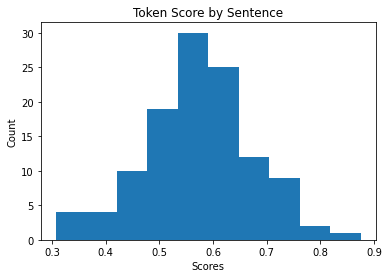

In [5]:
import matplotlib.pyplot as plt
def sentence_length(sentence):
    count = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            count += 1
    return count

def score_sentence_by_token(sentence, interesting_tokens):
    count = 0
    if sentence_length(sentence) == 0:
        return 0
    for token in sentence:
        if str(token).lower() in interesting_tokens:
            count += 1
    return count/sentence_length(sentence)

token_scores = []

for sentence in sentences:
    token_scores.append(score_sentence_by_token(sentence, interesting_tokens))
print(token_scores)
plt.hist(token_scores)
plt.title('Token Score by Sentence')
plt.xlabel('Scores')
plt.ylabel('Count')
plt.show() 

### Based on the histogram, the most common range of scores appear to be the range appears to be heavily between 0.5 - 0.65 with a high peak around 0.55 - 0.65.

### Question 6

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

[0.5, 0.5714285714285714, 0.5714285714285714, 0.5, 0.4230769230769231, 0.875, 0.4528301886792453, 0.4, 0.3684210526315789, 0.46153846153846156, 0.5294117647058824, 0.4375, 0.46153846153846156, 0.47619047619047616, 0.45454545454545453, 0.45454545454545453, 0.40625, 0.35294117647058826, 0.42857142857142855, 0.5555555555555556, 0.38461538461538464, 0.2222222222222222, 0.5714285714285714, 0.5, 0.391304347826087, 0.5227272727272727, 0.38095238095238093, 0.5925925925925926, 0.5909090909090909, 0.5428571428571428, 0.3333333333333333, 0.5666666666666667, 0.4482758620689655, 0.5217391304347826, 0.32, 0.36363636363636365, 0.3, 0.5, 0.3333333333333333, 0.4791666666666667, 0.30303030303030304, 0.3333333333333333, 0.2857142857142857, 0.46153846153846156, 0.45652173913043476, 0.6206896551724138, 0.5675675675675675, 0.5, 0.35135135135135137, 0.5454545454545454, 0.2857142857142857, 0.2857142857142857, 0.4473684210526316, 0.3, 0.5294117647058824, 0.5217391304347826, 0.5555555555555556, 0.4, 0.592592592

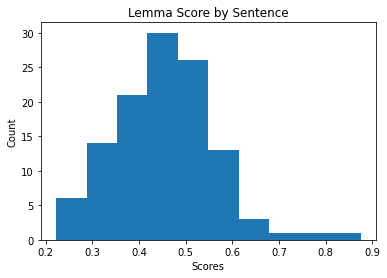

In [6]:
lemma_scores = []

interesting_lemmas, sent_index_lemmas = zip(*lemma_freq.most_common(5))
def score_sentence_by_lemma(sentence, interesting_lemmas):
    count = 0
    if sentence_length(sentence) == 0:
        return 0
    else:
        for token in sentence:
            if token.lemma_.lower() in interesting_tokens:
                count += 1
        return count/sentence_length(sentence)

    

for sentence in sentences:
    lemma_scores.append(score_sentence_by_lemma(sentence, interesting_lemmas))
print(lemma_scores)

plt.hist(lemma_scores)
plt.title('Lemma Score by Sentence')
plt.xlabel('Scores')
plt.ylabel('Count')
plt.show() 

### Looking at the histogram for the lemma scores is between 0.4-0.55 with peaks around 0.45-0.55.

### Question 7:

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.74
* Cutoff Score (lemmas): 0.58

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

### Question 8:

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [7]:
token_cutoff = 0.74
token_summary = []
for sentence in sentences:
    if(score_sentence_by_token(sentence, interesting_tokens)>token_cutoff):
        token_summary.append(str(sentence))
print(' '.join(token_summary))




Unauthorized use is prohibited. ByRachel FobarPublished May 20, 2022• 15 min readShareTweetEmailUpdate: Unauthorized use is prohibited. In the July 20 report, inspectors noted seven direct non-compliances, including food deprivation, cramped living spaces, and inadequate veterinary care for ear infections and oozing wounds. Unauthorized use is prohibited. FDA press officer Veronika Pfaeffle said her agency aims to “reduce the reliance on animal-based studies” and has taken significant steps in “replacing, reducing, and/or refining” them, including forming working groups to advance new technologies. Unauthorized use is prohibited. Investigations are ongoing.”The National Geographic Society supports Wildlife Watch, our investigative reporting project focused on wildlife crime and exploitation.


### Question 9:

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [8]:
text = (' '.join(token_summary))
doc2 = nlp(text)
doc2._.blob.polarity                  
print('Polarity score for this article is:', doc2._.blob.polarity)
print('The number of sentences for the token summary is:',len(token_summary))

Polarity score for this article is: 0.20378787878787877
The number of sentences for the token summary is: 9


### Question 10:

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [9]:
lemma_cutoff = 0.58
lemma_summary = []
for sentence in sentences:
    if(score_sentence_by_lemma(sentence, interesting_lemmas)>=lemma_cutoff):
        lemma_summary.append(str(sentence))
print(' '.join(lemma_summary))
print(len(lemma_summary))

ByRachel FobarPublished May 20, 2022• 15 min readShareTweetEmailUpdate: In early April, Virginia’s Republican governor, Glenn Youngkin, signed five “beagle bills” to protect research animals and block dealers from doing business after severe welfare violations. U.S. Senators Mark Warner and Tim Kaine, both Democrats, wrote to the USDA urging it to “pursue aggressive enforcement actions” against Envigo. Envigo’s record is an “unmitigated, unprecedented disaster,” says Eric Kleiman, a researcher at the Animal Welfare Institute, a nonprofit organization based in Washington, D.C.USDA’s spotty enforcement recordNational In the July 20 report, inspectors noted seven direct non-compliances, including food deprivation, cramped living spaces, and inadequate veterinary care for ear infections and oozing wounds. Photograph by Humane SocietyPlease be respectful of copyright. Photograph by Humane SocietyPlease be respectful of copyright. Investigations are ongoing.”The National Geographic Society s

### Question 11:

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [10]:
text = (' '.join(lemma_summary))
doc3 = nlp(text)
doc3._.blob.polarity                  
print('Polarity score for this article is:', doc3._.blob.polarity)
print('The number of sentences for the lemma summary is:',len(lemma_summary))

Polarity score for this article is: 0.36
The number of sentences for the lemma summary is: 9


### Question 12:

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

### Answer:

The polarity scores for the original article lean more towards a neutral side.  The token summary is a little more positive and the lemma summary is even more positive. The original article for neutral on the positive side I could see because of the organization that was writing the article.  Similar to a newspaper, it would need to try to say somewhat neutral.  I was very surprised to see each summary because more positive.  After reading the full article, yes I was very happy that these animals had been rescued but I had such a negative feeling towards the research company and the other information pertaining to the lack of care. Reading the summaries I feel like it did focus in on the better parts of it, such as the "beagle bill" and grazed over the state in which these animals were living.  Based on the summaries, I think the polarity scores are right on target.

Article|Polarity|Sentence
---|---|---|
Orginal|0.16|170
Token_Summary|0.20|9
Lemma_Summary|0.36|9

### Question 13:

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

### Answer:

I would say the lemma summary is the better summary.  The lemma summary I believe provided a little better picture and some more positive outcomes of a terrible event.  I believe this summar was better because with lemmas you are looking at base words.  This allows for a base word such as animal to include the plural, animals, in the frequency count.  By doing so, either word showing up in the sentence would increase the freq/sentence score giving a better selection of sentences.
